# Prediction using Supervised ML
#### AUTHOR : DEVENDRA CHATURVEDI
### OBJECTIVE :
#### In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied

In [1]:
# Importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Reading data from given link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("data has been imported sucessfully")
# displaying imported data 
data.head()


data has been imported sucessfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


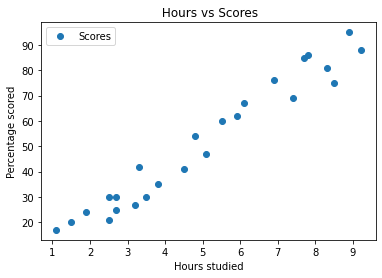

In [3]:
# plotting our data points on 2-D graph to  manually find any relationship between the data using matplotlib
data.plot(x="Hours", y="Scores", style='o')
plt.title(" Hours vs Scores")
plt.xlabel("Hours studied")
plt.ylabel("Percentage scored")
plt.show()

### From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

## Preparing the data
### next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [4]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values 

### Now we have our attributes(X) and labels(y) 
### the next step is to split this data into training and test sets. 
### Im going to use Scikit-Learn's built-in train_test_split() method:

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

## Training the Algorithm
### We have split our data into training and testing sets 
### now we willl train our algorithm.

In [6]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print("training complete")

training complete


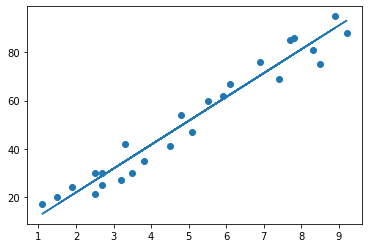

In [7]:
# Now we will plot regession line 
line = regressor.coef_*X+regressor.intercept_
# plotting for test data 
plt.scatter(X,y)
plt.plot(X,line)
plt.show()

## Making Predictions
#### After training our data now is the time to make some predictions

In [8]:
print(X_test) # tesing data in hours 

y_pred = regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [9]:
# comparing predicted data with actual data
df = pd.DataFrame({"Actual data":y_test, "predicted data":y_pred})
print(df)

   Actual data  predicted data
0           20       16.884145
1           27       33.732261
2           69       75.357018
3           30       26.794801
4           62       60.491033


### Graph of Actual Vs Predicted values 

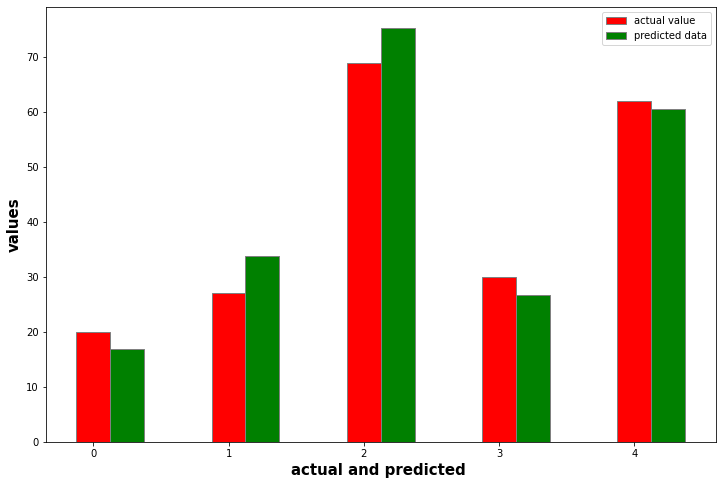

In [10]:

barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
 
 
# Set position of bar on X axis
br1 = np.arange(len(y_test))
br2 = [x + barWidth for x in br1]
 
# Make the plot
plt.bar(br1, y_test, color ='r', width = barWidth,
        edgecolor ='grey', label ='actual value')
plt.bar(br2, y_pred, color ='g', width = barWidth,
        edgecolor ='grey', label ='predicted data')

 
# Adding Xticks
plt.xlabel('actual and predicted ', fontweight ='bold', fontsize = 15)
plt.ylabel('values', fontweight ='bold', fontsize = 15)
 
plt.legend()
plt.show()

#### From the above graph we says that the predicted percentages are close to the actual values

In [11]:
# now we will test it with our own data which is question given below
# What will be predicted score if a student studies for 9.25 hrs/ day?
hours = np.array([9.25]).reshape(-1,1)
own_pred = regressor.predict(hours)
print("numbers of hours studies= {}".format(hours))
print("predicted score = {}".format(own_pred[0]))

numbers of hours studies= [[9.25]]
predicted score = 93.69173248737538


## Evaluating the model
#### we will use root mean square method to evaluate the performance of algorithm , there are many other metrics availabe also

In [12]:
from sklearn import metrics
print("mean absolute error: ", metrics.mean_absolute_error(y_test, y_pred))

mean absolute error:  4.183859899002975


In [13]:
from scipy import stats
slope,inter,r,p,std=stats.linregress(y_test,y_pred)
print("R-squared value:",r)

R-squared value: 0.9806835759589493


#### Here R-squared=0.9806 means the model explain 98.06% of variability in the dependent variable (Scores) by independent variable(Hours).

## thank you